In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [20]:
df = np.array([[185, 72],
              [170, 56],
              [168, 60],
              [179, 68],
              [182, 72],
              [188,77],
              [180,71],
              [180,70],
              [183,84],
              [180,88],
              [180,67],
              [177,76]])

In [52]:
print(df)

[[185  72]
 [170  56]
 [168  60]
 [179  68]
 [182  72]
 [188  77]
 [180  71]
 [180  70]
 [183  84]
 [180  88]
 [180  67]
 [177  76]]


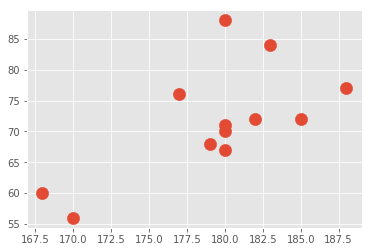

In [22]:
plt.scatter(df[:,0],df[:,1],s=150)
plt.show()

In [41]:
m = df.shape[0]
n = df.shape[1]

iterations = 500
K=2

In [42]:
print(m,n)

12 2


In [43]:
Cent = np.array([]).reshape(n,0) #Initialising an empty array for K centroids... The reshape() function is applies so that the dimension of Cent matches with that of the dataframe
for i in range(K):
    r = rd.randint(0,m-1) # Generates a random number between 0 and m, where m is the number of tuples
    Cent = np.c_[Cent,df[r]]

In [44]:
print(Cent.shape)
print(Cent) #The printed array is an array consisting of five randomly chosen centroids

(2, 2)
[[180. 180.]
 [ 70.  67.]]


In [45]:
op = {}

The main algorithm has two components each of which has been separately shown below and the combined and run later in the program

In [46]:
# distance = np.array([]).reshape(m,0) #An empty array is initialised to stores distance of each point from each of the two centroids
# for k in range(K):
#     temp = np.sum((df-Cent[:,k])**2,axis=1) # The EUCLIDIAN DISTANCE is calculalted as follow and then appended to the array
#     distance = np.c_[distance,temp]
# print(distance)
# C = np.argmin(distance,axis=1)+1 # .argmin() Returns the indices of the minimum values along an axis.
# print(C)

This is the second module which classifies the points by making a dictionary, wherein the key is the cluster number and value for that keyy is the array of elements which belong to that cluster

In [34]:
# Y = {} #An empty dictionary is initialised
# for k in range(K):
#     Y[k+1] = np.array([]).reshape(2,0) #The key number in the dictionary starts from 1 to K, which is the number of clusters
# for i in range(m):
#     Y[C[i]] = np.c_[Y[C[i]],df[i]] # Here m is 12, i.e the number of tuples, C[i] is the the cluster number assigned to that tuple, refer the above step.
# for k in range(K):
#     Y[k+1] = Y[k+1].T #This step takes transpose of the value stored in for the key K
# for k in range(K):
#     Cent[:,k] = np.mean(Y[k+1],axis=0) #Here we are calculating the new centroid after kth iteration of clustering is complete

The cell below shows both the above explained steps combined together

In [47]:
for i in range(iterations):
    Distance=np.array([]).reshape(m,0) 
    for k in range(K):
        tempDist=np.sum((df-Cent[:,k])**2,axis=1)
        Distance=np.c_[Distance,tempDist]
    C=np.argmin(Distance,axis=1)+1
    
   
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],df[i]]
    
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
          Cent[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

In [48]:
print(Y)

{1: array([[185.,  72.],
       [182.,  72.],
       [188.,  77.],
       [180.,  71.],
       [180.,  70.],
       [183.,  84.],
       [180.,  88.],
       [177.,  76.]]), 2: array([[170.,  56.],
       [168.,  60.],
       [179.,  68.],
       [180.,  67.]])}


Text(0.5, 1.0, 'Unclustured Data')

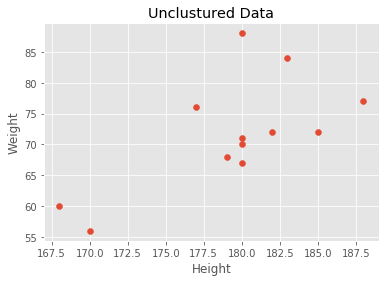

In [49]:
plt.scatter(df[:,0],df[:,1])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Unclustured Data")

Text(0, 0.5, 'Weight')

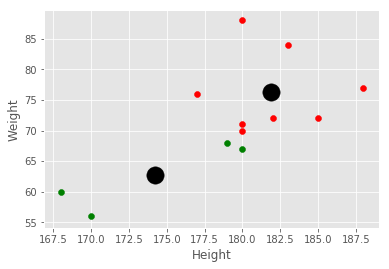

In [51]:
color = ['red','green']
labels = ['c1','c2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Cent[0,:],Cent[1,:],s=300,c='black',label='Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
